In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Recommendation/coursera_courses.csv'

data = pd.read_csv(path)
data.head()

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,492,Beginner,https://www.coursera.org/specializations/sscp-...,"6,958","['Risk Management', 'Access Control', 'Asset',...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,51,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,531","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,62,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,377",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,517,Intermediate,https://www.coursera.org/learn/crash-course-in...,"39,004","['Instrumental Variable', 'Propensity Score Ma...",[],We have all heard the phrase “correlation does...
4,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,NaN,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...


In [ ]:
print(f'Duplicate: {data.duplicated().sum()}')

Duplicate: 0


In [ ]:
clean_ds = data.drop(columns=['course_rating', 'course_organization', 'course_certificate_type', 'course_time', 'course_certificate_type', 'course_reviews_num', 'course_url', 'course_students_enrolled'])

In [ ]:
clean_ds['course_difficulty'].unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], dtype=object)

In [ ]:
clean_ds.columns

Index(['course_title', 'course_difficulty', 'course_skills', 'course_summary',
       'course_description'],
      dtype='object')

In [ ]:
import ast

clean_ds['course_skills'] = clean_ds['course_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

print(clean_ds['course_skills'].iloc[0])      # hasilnya list
print(type(clean_ds['course_skills'].iloc[0]))

clean_ds['course_skills'] = clean_ds['course_skills'].apply(lambda x: " ".join(x))
clean_ds['course_skills'].iloc[0]

['Risk Management', 'Access Control', 'Asset', 'Incident Detection and Response', 'Cloud Computing Security', 'Wireless Security', 'Security Software']
<class 'list'>


'Risk Management Access Control Asset Incident Detection and Response Cloud Computing Security Wireless Security Security Software'

In [ ]:
clean_ds['course_summary'] = clean_ds['course_summary'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

print(clean_ds['course_summary'].iloc[0])      # hasilnya list
print(type(clean_ds['course_summary'].iloc[0]))

clean_ds['course_summary'] = clean_ds['course_summary'].apply(lambda x: " ".join(x))
clean_ds['course_summary'].iloc[1]

[]
<class 'list'>


"Master .NET full stack web dev: from .NET core basics to advanced web application creation using .NET technologies.   Dive into React frontend development: from foundational HTML & CSS to dynamic UI design using JavaScript and React's core concepts.  Explore backend with ASP.NET: Understand ASP.NET Core architecture, MVC patterns, and build RESTful web APIs with integrated front-end applications.  Acquire robust full-stack skills: Ensuring proficiency in creating scalable, high-quality web applications tailored to modern business needs. "

In [ ]:
!pip install nltk

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
for col in clean_ds.columns:
    clean_ds[col] = clean_ds[col].fillna("").astype(str)

In [ ]:
print(data.isna().sum())

course_title                 0
course_organization          0
course_certificate_type      0
course_time                  0
course_rating                6
course_reviews_num           6
course_difficulty            0
course_url                   0
course_students_enrolled    41
course_skills                0
course_summary               0
course_description           1
dtype: int64


In [ ]:
stopword = stopwords.words('english')
punctuations = string.punctuation
lemmatizer = WordNetLemmatizer()

def preprocess(text):
  sentences = sent_tokenize(text)
  token = []

  for sent in sentences:
    words = word_tokenize(sent)

    for word in words:
      word = word.lower()

      if word not in stopword and word not in punctuations and word.isalpha():
        lemma = lemmatizer.lemmatize(word)
        token.append(lemma)

  result = ' '.join(token)
  return result

In [ ]:
data['Combined'] = clean_ds['course_title'].apply(preprocess) + " " + clean_ds['course_difficulty'].apply(preprocess) + " " + clean_ds['course_skills'].apply(preprocess) + " " + clean_ds['course_summary'].apply(preprocess) + " " + clean_ds['course_description'].apply(preprocess)

In [ ]:
data = data.drop(columns=['course_students_enrolled'])

In [ ]:
data.head()

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_skills,course_summary,course_description,Combined
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,492,Beginner,https://www.coursera.org/specializations/sscp-...,"['Risk Management', 'Access Control', 'Asset',...",[],Pursue better IT security job opportunities an...,isc system security certified practitioner ssc...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,51,Intermediate,https://www.coursera.org/specializations/dot-n...,"['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...,fullstack developer intermediate web api web d...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,62,Beginner,https://www.coursera.org/learn/21st-century-en...,[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu...",century energy transition make work beginner ...
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,517,Intermediate,https://www.coursera.org/learn/crash-course-in...,"['Instrumental Variable', 'Propensity Score Ma...",[],We have all heard the phrase “correlation does...,crash course causality inferring causal effect...
4,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...,life adhd beginner differential diagnosis como...


In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['Combined'])
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 97026 stored elements and shape (1000, 12150)>

In [ ]:
data.shape

(1000, 12)

In [ ]:
data['Combined'].iloc[0]

'isc system security certified practitioner sscp beginner risk management access control asset incident detection response cloud computing security wireless security security software  pursue better security job opportunity prove knowledge confidence sscp professional training certificate show employer security foundation defend cyber attack put clear path earning sscp certification learn schedule access content aligned latest isc sscp exam domain offering complete online program saving get domain bundled together step career advancement register course gain access day register sit sscp certification exam upon completing sscp professional certificate complete six course preparing sit system security certified practitioner sscp certification exam open new tabas outlined course access control course security operation administration course risk identification monitoring response recovery course cryptography course network communication security course system application security receive 

In [ ]:
data.to_csv('clean_data.csv', index = False)

Best k = 29, dengan silhouette score = 0.038


Text(0, 0.5, 'WCSS')

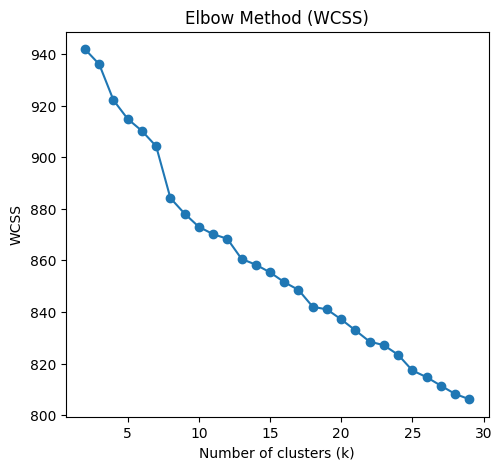

In [ ]:
X = vectorizer.fit_transform(data['Combined'])

wcss = []
sil_scores = []
k_values = range(2, 30)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(X)

    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

best_idx = sil_scores.index(max(sil_scores))
best_k = k_values[best_idx]
best_score = sil_scores[best_idx]

print(f"Best k = {best_k}, dengan silhouette score = {best_score:.3f}")
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker="o")
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

In [ ]:
model = KMeans(n_clusters=29, random_state=42)
model.fit(X)

KMeans(n_clusters=29, random_state=42)

In [ ]:
import pickle

with open('recomBook.pickle', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
with open('recomBook.pickle', 'rb') as file:
  model = pickle.load(file)

In [ ]:
data['Cluster'] = model.labels_

In [ ]:
data.head()

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_skills,course_summary,course_description,Combined,Cluster
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,492,Beginner,https://www.coursera.org/specializations/sscp-...,"['Risk Management', 'Access Control', 'Asset',...",[],Pursue better IT security job opportunities an...,isc system security certified practitioner ssc...,3
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,51,Intermediate,https://www.coursera.org/specializations/dot-n...,"['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...,fullstack developer intermediate web api web d...,24
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,62,Beginner,https://www.coursera.org/learn/21st-century-en...,[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu...",century energy transition make work beginner ...,22
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,517,Intermediate,https://www.coursera.org/learn/crash-course-in...,"['Instrumental Variable', 'Propensity Score Ma...",[],We have all heard the phrase “correlation does...,crash course causality inferring causal effect...,27
4,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...,life adhd beginner differential diagnosis como...,27


In [ ]:
def recom2(text, n_rec = 5):
  inp_vec = vectorizer.transform([text])
  similiarity = cosine_similarity(inp_vec, X).flatten()

  best_sim_idx = similiarity.argmax()
  best_data = data.iloc[best_sim_idx]
  best_cluster = best_data['Cluster']

  temp_data = data['Cluster'] == best_cluster
  copy_data = data[temp_data].copy()

  spesified_data = X[temp_data.values]
  spesified_sim = cosine_similarity(inp_vec, spesified_data).flatten()

  copy_data['Similarity'] = spesified_sim

  rec = copy_data.sort_values(by = 'Similarity', ascending = False).head(n_rec)
  return rec

In [ ]:
rec = recom2("Python", n_rec = 5)
rec

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_skills,course_summary,course_description,Combined,Cluster,Similarity
998,用 Python 做商管程式設計（一）(Programming for Business C...,National Taiwan University,Course,1 - 3 Months,4.9,814,Beginner,https://www.coursera.org/learn/pbc1,[],[],本系列課程從零開始，教授一般認為最適合初學者的程式語言「Python」，目標是讓大家在完成本...,用 python programming business computing python...,6,0.752973
999,用 Python 做商管程式設計（二）(Programming for Business C...,National Taiwan University,Course,1 - 4 Weeks,4.6,249,Intermediate,https://www.coursera.org/learn/pbc2,[],[],接續用 Python 做商管程式設計（一）的內容，我們將在這個課程中繼續探討Python語言...,用 python programming business computing python...,6,0.691634
829,"Python for Data Science, AI & Development",IBM,Course,1 - 3 Months,4.6,33.8k,Beginner,https://www.coursera.org/learn/python-for-appl...,"['Data Science', 'Python Programming', 'Data A...","['Describe Python Basics including Data Types,...",Kickstart your learning of Python with this be...,python data science ai development beginner da...,6,0.594424
800,Programming for Everybody (Getting Started wit...,University of Michigan,Course,1 - 3 Months,4.8,224.7k,Beginner,https://www.coursera.org/learn/python,"['Python Syntax And Semantics', 'Basic Program...",['Install Python and write your first program'...,This course aims to teach everyone the basics ...,programming everybody getting started python b...,6,0.531683
822,Python Data Structures,University of Michigan,Course,1 - 3 Months,4.9,93.9k,Beginner,https://www.coursera.org/learn/python-data,"['Python Syntax And Semantics', 'Data Structur...",['Explain the principles of data structures & ...,This course will introduce the core data struc...,python data structure beginner python syntax s...,6,0.501420


In [ ]:
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

In [ ]:
import numpy as np
data = data.replace({np.nan: None})

In [ ]:
data[data['course_description'].isna()]

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_skills,course_summary,course_description,Combined,Cluster
626,Investment and Portfolio Management,Rice University,Specialization,3 - 6 Months,4.6,1.6k,Beginner,https://www.coursera.org/specializations/inves...,"['Performance Attribution', 'Behavioral Financ...",['Write custom Python code and use existing Py...,None,investment portfolio management beginner perfo...,6


In [ ]:
data.to_csv('clean_data.csv', index=False)